In [4]:
from fastai.vision.all import *
from fastbook import *
import matplotlib.pyplot as plt

In [4]:
## Implementing SGD
## Speed of a roller coaster

In [20]:
# Measuring over 20 seocnds
time = torch.arange(0,20).float()
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1

# Create a function for speed and seperate out the parameters from the independent variable

def f(t, params):
    a,b,c = params
    return (a*(t**2) + (b*t) + c)

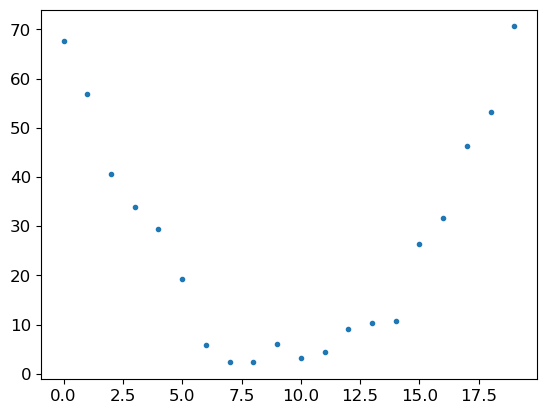

In [21]:
plt.plot(time, speed, ".")

In [36]:
def mse(pred, targets): 
    return ((pred-targets)**2).mean().sqrt()

params = torch.randn(3).requires_grad_()

In [37]:
preds = f(time, params)
preds

tensor([ -0.5426,  -1.9632,  -3.5655,  -5.3497,  -7.3156,  -9.4633, -11.7928, -14.3041, -16.9971, -19.8719, -22.9285, -26.1669, -29.5871, -33.1891, -36.9728, -40.9383, -45.0856, -49.4147, -53.9255,
        -58.6182], grad_fn=<AddBackward0>)

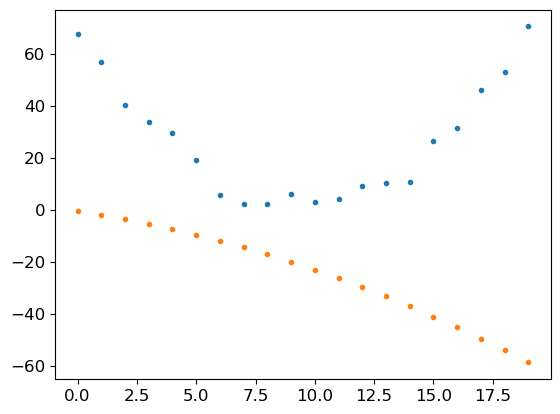

In [38]:
plt.plot(time, speed,".", preds.detach(), ".")

In [ ]:
loss = mse(preds, speed)
loss.backward()

In [42]:
params.grad *1e-5

tensor([-1.5084e-03, -9.8628e-05, -8.5775e-06])

In [43]:
params

tensor([-0.0909, -1.3297, -0.5426], requires_grad=True)

In [45]:
lr = 1e-5
params.data -= lr*params.grad.data
params.grad = None

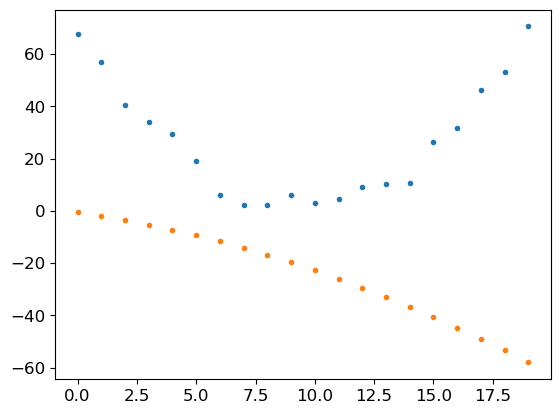

In [46]:
new_preds = f(time, params)
mse(new_preds, speed)
plt.plot(time, speed,".", new_preds.detach(), ".")

In [75]:
# Define

lr = 1e-5

def f(t, params):
    a,b,c = params
    return (a*(t**2) + (b*t) + c)

def mse(pred, targets): 
    return ((pred-targets)**2).mean().sqrt()

def apply_step(param):
    preds = f(time, params)
    loss = mse(preds, speed)
    loss.backward()
    params.data -= lr*params.grad.data
    params.grad = None
    print(loss)
    return preds
    
    

In [76]:
#Init
time = torch.arange(0,20).float()
speed = torch.randn(20)*3 + 0.75*(time-9.5)**2 + 1
params = torch.randn(3).requires_grad_()

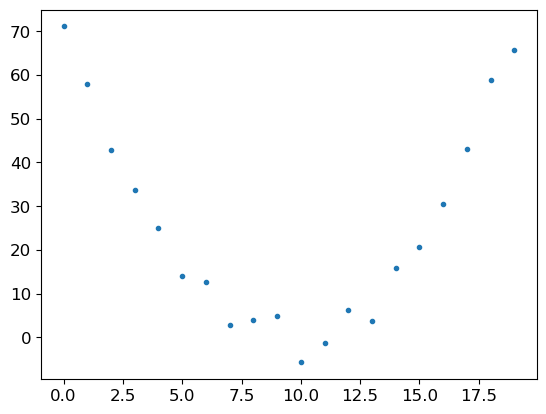

In [77]:
# Init Plot check
plt.plot(time, speed,".")

In [93]:
# Loop

for i in range(100):
    preds = apply_step(params)

tensor(25.7602, grad_fn=<SqrtBackward0>)
tensor(25.7601, grad_fn=<SqrtBackward0>)
tensor(25.7600, grad_fn=<SqrtBackward0>)
tensor(25.7599, grad_fn=<SqrtBackward0>)
tensor(25.7598, grad_fn=<SqrtBackward0>)
tensor(25.7597, grad_fn=<SqrtBackward0>)
tensor(25.7597, grad_fn=<SqrtBackward0>)
tensor(25.7596, grad_fn=<SqrtBackward0>)
tensor(25.7595, grad_fn=<SqrtBackward0>)
tensor(25.7594, grad_fn=<SqrtBackward0>)
tensor(25.7593, grad_fn=<SqrtBackward0>)
tensor(25.7592, grad_fn=<SqrtBackward0>)
tensor(25.7592, grad_fn=<SqrtBackward0>)
tensor(25.7591, grad_fn=<SqrtBackward0>)
tensor(25.7590, grad_fn=<SqrtBackward0>)
tensor(25.7589, grad_fn=<SqrtBackward0>)
tensor(25.7589, grad_fn=<SqrtBackward0>)
tensor(25.7588, grad_fn=<SqrtBackward0>)
tensor(25.7587, grad_fn=<SqrtBackward0>)
tensor(25.7586, grad_fn=<SqrtBackward0>)
tensor(25.7586, grad_fn=<SqrtBackward0>)
tensor(25.7585, grad_fn=<SqrtBackward0>)
tensor(25.7584, grad_fn=<SqrtBackward0>)
tensor(25.7584, grad_fn=<SqrtBackward0>)
tensor(25.7583, 

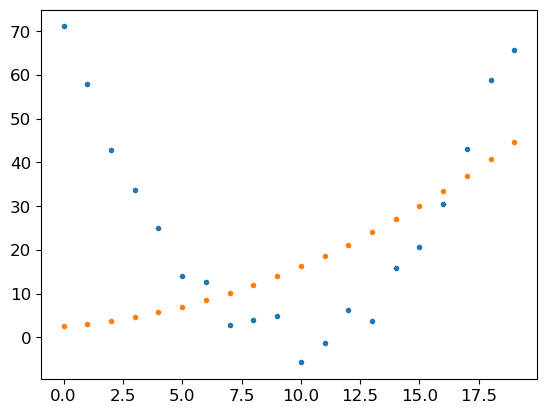

In [94]:
# Plot check

plt.plot(time, speed,".", preds.detach(), ".")

In [95]:
params.data

tensor([0.0937, 0.4349, 2.5137])

In [96]:
## Lets try this with a cos function


In [2]:
# Define 
lr = 1e-4

def mse(pred, targets): 
    return ((pred-targets)**2).mean().sqrt()

def mclrn(x, params):
    a,b,c,d,e = params
    return (a - b*(x**2/math.factorial(2)) + c*(x**4/math.factorial(4)) - d*(x**6/math.factorial(6)) + e*(x**8/math.factorial(8)))

def apply_step(param):
    preds = mclrn(x, params)
    loss = mse(preds, y)
    loss.backward()
    params.data -= lr*params.grad.data
    params.grad = None
    if loss< 70:
        print(loss)
    return preds, loss
    


In [5]:
## Init 

Noise_level = 0.2
noise = torch.randn(100)*Noise_level

x = torch.linspace(-2*torch.pi,2*torch.pi, steps= 100) 
y = torch.cos(x)# + noise
params = torch.randn(5).float().requires_grad_()

In [6]:
params

tensor([-0.5672, -0.5706,  1.5980,  0.1115, -0.0392], requires_grad=True)

In [7]:
for i in range(3000): 
    preds, loss = apply_step(params)
    print(loss)

#plt.plot(x, preds.detach(), ".", label = "Predictions")
#plt.plot(x,y,"+",label="Targets")
#plt.legend()
#plt.show()

TensorBase(1370.9194, grad_fn=<AliasBackward0>)
TensorBase(715.3859, grad_fn=<AliasBackward0>)
TensorBase(382.6915, grad_fn=<AliasBackward0>)
TensorBase(213.7294, grad_fn=<AliasBackward0>)
TensorBase(127.8077, grad_fn=<AliasBackward0>)
TensorBase(84.0030, grad_fn=<AliasBackward0>)
TensorBase(61.5609, grad_fn=<AliasBackward0>)
TensorBase(61.5609, grad_fn=<AliasBackward0>)
TensorBase(49.9557, grad_fn=<AliasBackward0>)
TensorBase(49.9557, grad_fn=<AliasBackward0>)
TensorBase(43.8491, grad_fn=<AliasBackward0>)
TensorBase(43.8491, grad_fn=<AliasBackward0>)
TensorBase(40.5338, grad_fn=<AliasBackward0>)
TensorBase(40.5338, grad_fn=<AliasBackward0>)
TensorBase(38.6367, grad_fn=<AliasBackward0>)
TensorBase(38.6367, grad_fn=<AliasBackward0>)
TensorBase(37.4615, grad_fn=<AliasBackward0>)
TensorBase(37.4615, grad_fn=<AliasBackward0>)
TensorBase(36.6549, grad_fn=<AliasBackward0>)
TensorBase(36.6549, grad_fn=<AliasBackward0>)
TensorBase(36.0378, grad_fn=<AliasBackward0>)
TensorBase(36.0378, grad_fn=

TensorBase(3.7213, grad_fn=<AliasBackward0>)
TensorBase(3.7213, grad_fn=<AliasBackward0>)
TensorBase(3.6838, grad_fn=<AliasBackward0>)
TensorBase(3.6838, grad_fn=<AliasBackward0>)
TensorBase(3.6468, grad_fn=<AliasBackward0>)
TensorBase(3.6468, grad_fn=<AliasBackward0>)
TensorBase(3.6102, grad_fn=<AliasBackward0>)
TensorBase(3.6102, grad_fn=<AliasBackward0>)
TensorBase(3.5740, grad_fn=<AliasBackward0>)
TensorBase(3.5740, grad_fn=<AliasBackward0>)
TensorBase(3.5383, grad_fn=<AliasBackward0>)
TensorBase(3.5383, grad_fn=<AliasBackward0>)
TensorBase(3.5030, grad_fn=<AliasBackward0>)
TensorBase(3.5030, grad_fn=<AliasBackward0>)
TensorBase(3.4682, grad_fn=<AliasBackward0>)
TensorBase(3.4682, grad_fn=<AliasBackward0>)
TensorBase(3.4337, grad_fn=<AliasBackward0>)
TensorBase(3.4337, grad_fn=<AliasBackward0>)
TensorBase(3.3997, grad_fn=<AliasBackward0>)
TensorBase(3.3997, grad_fn=<AliasBackward0>)
TensorBase(3.3660, grad_fn=<AliasBackward0>)
TensorBase(3.3660, grad_fn=<AliasBackward0>)
TensorBase

TensorBase(0.8340, grad_fn=<AliasBackward0>)
TensorBase(0.8340, grad_fn=<AliasBackward0>)
TensorBase(0.8310, grad_fn=<AliasBackward0>)
TensorBase(0.8310, grad_fn=<AliasBackward0>)
TensorBase(0.8279, grad_fn=<AliasBackward0>)
TensorBase(0.8279, grad_fn=<AliasBackward0>)
TensorBase(0.8249, grad_fn=<AliasBackward0>)
TensorBase(0.8249, grad_fn=<AliasBackward0>)
TensorBase(0.8219, grad_fn=<AliasBackward0>)
TensorBase(0.8219, grad_fn=<AliasBackward0>)
TensorBase(0.8189, grad_fn=<AliasBackward0>)
TensorBase(0.8189, grad_fn=<AliasBackward0>)
TensorBase(0.8160, grad_fn=<AliasBackward0>)
TensorBase(0.8160, grad_fn=<AliasBackward0>)
TensorBase(0.8131, grad_fn=<AliasBackward0>)
TensorBase(0.8131, grad_fn=<AliasBackward0>)
TensorBase(0.8103, grad_fn=<AliasBackward0>)
TensorBase(0.8103, grad_fn=<AliasBackward0>)
TensorBase(0.8075, grad_fn=<AliasBackward0>)
TensorBase(0.8075, grad_fn=<AliasBackward0>)
TensorBase(0.8047, grad_fn=<AliasBackward0>)
TensorBase(0.8047, grad_fn=<AliasBackward0>)
TensorBase

TensorBase(0.5747, grad_fn=<AliasBackward0>)
TensorBase(0.5744, grad_fn=<AliasBackward0>)
TensorBase(0.5744, grad_fn=<AliasBackward0>)
TensorBase(0.5742, grad_fn=<AliasBackward0>)
TensorBase(0.5742, grad_fn=<AliasBackward0>)
TensorBase(0.5740, grad_fn=<AliasBackward0>)
TensorBase(0.5740, grad_fn=<AliasBackward0>)
TensorBase(0.5737, grad_fn=<AliasBackward0>)
TensorBase(0.5737, grad_fn=<AliasBackward0>)
TensorBase(0.5735, grad_fn=<AliasBackward0>)
TensorBase(0.5735, grad_fn=<AliasBackward0>)
TensorBase(0.5733, grad_fn=<AliasBackward0>)
TensorBase(0.5733, grad_fn=<AliasBackward0>)
TensorBase(0.5731, grad_fn=<AliasBackward0>)
TensorBase(0.5731, grad_fn=<AliasBackward0>)
TensorBase(0.5729, grad_fn=<AliasBackward0>)
TensorBase(0.5729, grad_fn=<AliasBackward0>)
TensorBase(0.5726, grad_fn=<AliasBackward0>)
TensorBase(0.5726, grad_fn=<AliasBackward0>)
TensorBase(0.5724, grad_fn=<AliasBackward0>)
TensorBase(0.5724, grad_fn=<AliasBackward0>)
TensorBase(0.5722, grad_fn=<AliasBackward0>)
TensorBase

TensorBase(0.5403, grad_fn=<AliasBackward0>)
TensorBase(0.5403, grad_fn=<AliasBackward0>)
TensorBase(0.5403, grad_fn=<AliasBackward0>)
TensorBase(0.5403, grad_fn=<AliasBackward0>)
TensorBase(0.5402, grad_fn=<AliasBackward0>)
TensorBase(0.5402, grad_fn=<AliasBackward0>)
TensorBase(0.5401, grad_fn=<AliasBackward0>)
TensorBase(0.5401, grad_fn=<AliasBackward0>)
TensorBase(0.5400, grad_fn=<AliasBackward0>)
TensorBase(0.5400, grad_fn=<AliasBackward0>)
TensorBase(0.5400, grad_fn=<AliasBackward0>)
TensorBase(0.5400, grad_fn=<AliasBackward0>)
TensorBase(0.5399, grad_fn=<AliasBackward0>)
TensorBase(0.5399, grad_fn=<AliasBackward0>)
TensorBase(0.5398, grad_fn=<AliasBackward0>)
TensorBase(0.5398, grad_fn=<AliasBackward0>)
TensorBase(0.5397, grad_fn=<AliasBackward0>)
TensorBase(0.5397, grad_fn=<AliasBackward0>)
TensorBase(0.5396, grad_fn=<AliasBackward0>)
TensorBase(0.5396, grad_fn=<AliasBackward0>)
TensorBase(0.5396, grad_fn=<AliasBackward0>)
TensorBase(0.5396, grad_fn=<AliasBackward0>)
TensorBase

TensorBase(0.5183, grad_fn=<AliasBackward0>)
TensorBase(0.5183, grad_fn=<AliasBackward0>)
TensorBase(0.5182, grad_fn=<AliasBackward0>)
TensorBase(0.5182, grad_fn=<AliasBackward0>)
TensorBase(0.5181, grad_fn=<AliasBackward0>)
TensorBase(0.5181, grad_fn=<AliasBackward0>)
TensorBase(0.5181, grad_fn=<AliasBackward0>)
TensorBase(0.5181, grad_fn=<AliasBackward0>)
TensorBase(0.5180, grad_fn=<AliasBackward0>)
TensorBase(0.5180, grad_fn=<AliasBackward0>)
TensorBase(0.5179, grad_fn=<AliasBackward0>)
TensorBase(0.5179, grad_fn=<AliasBackward0>)
TensorBase(0.5179, grad_fn=<AliasBackward0>)
TensorBase(0.5179, grad_fn=<AliasBackward0>)
TensorBase(0.5178, grad_fn=<AliasBackward0>)
TensorBase(0.5178, grad_fn=<AliasBackward0>)
TensorBase(0.5177, grad_fn=<AliasBackward0>)
TensorBase(0.5177, grad_fn=<AliasBackward0>)
TensorBase(0.5177, grad_fn=<AliasBackward0>)
TensorBase(0.5177, grad_fn=<AliasBackward0>)
TensorBase(0.5176, grad_fn=<AliasBackward0>)
TensorBase(0.5176, grad_fn=<AliasBackward0>)
TensorBase

TensorBase(0.4980, grad_fn=<AliasBackward0>)
TensorBase(0.4980, grad_fn=<AliasBackward0>)
TensorBase(0.4979, grad_fn=<AliasBackward0>)
TensorBase(0.4979, grad_fn=<AliasBackward0>)
TensorBase(0.4979, grad_fn=<AliasBackward0>)
TensorBase(0.4979, grad_fn=<AliasBackward0>)
TensorBase(0.4978, grad_fn=<AliasBackward0>)
TensorBase(0.4978, grad_fn=<AliasBackward0>)
TensorBase(0.4978, grad_fn=<AliasBackward0>)
TensorBase(0.4978, grad_fn=<AliasBackward0>)
TensorBase(0.4977, grad_fn=<AliasBackward0>)
TensorBase(0.4977, grad_fn=<AliasBackward0>)
TensorBase(0.4976, grad_fn=<AliasBackward0>)
TensorBase(0.4976, grad_fn=<AliasBackward0>)
TensorBase(0.4976, grad_fn=<AliasBackward0>)
TensorBase(0.4976, grad_fn=<AliasBackward0>)
TensorBase(0.4975, grad_fn=<AliasBackward0>)
TensorBase(0.4975, grad_fn=<AliasBackward0>)
TensorBase(0.4974, grad_fn=<AliasBackward0>)
TensorBase(0.4974, grad_fn=<AliasBackward0>)
TensorBase(0.4974, grad_fn=<AliasBackward0>)
TensorBase(0.4974, grad_fn=<AliasBackward0>)
TensorBase

TensorBase(0.4799, grad_fn=<AliasBackward0>)
TensorBase(0.4799, grad_fn=<AliasBackward0>)
TensorBase(0.4798, grad_fn=<AliasBackward0>)
TensorBase(0.4798, grad_fn=<AliasBackward0>)
TensorBase(0.4797, grad_fn=<AliasBackward0>)
TensorBase(0.4797, grad_fn=<AliasBackward0>)
TensorBase(0.4797, grad_fn=<AliasBackward0>)
TensorBase(0.4797, grad_fn=<AliasBackward0>)
TensorBase(0.4796, grad_fn=<AliasBackward0>)
TensorBase(0.4796, grad_fn=<AliasBackward0>)
TensorBase(0.4796, grad_fn=<AliasBackward0>)
TensorBase(0.4796, grad_fn=<AliasBackward0>)
TensorBase(0.4795, grad_fn=<AliasBackward0>)
TensorBase(0.4795, grad_fn=<AliasBackward0>)
TensorBase(0.4795, grad_fn=<AliasBackward0>)
TensorBase(0.4795, grad_fn=<AliasBackward0>)
TensorBase(0.4794, grad_fn=<AliasBackward0>)
TensorBase(0.4794, grad_fn=<AliasBackward0>)
TensorBase(0.4793, grad_fn=<AliasBackward0>)
TensorBase(0.4793, grad_fn=<AliasBackward0>)
TensorBase(0.4793, grad_fn=<AliasBackward0>)
TensorBase(0.4793, grad_fn=<AliasBackward0>)
TensorBase

TensorBase(0.4614, grad_fn=<AliasBackward0>)
TensorBase(0.4613, grad_fn=<AliasBackward0>)
TensorBase(0.4613, grad_fn=<AliasBackward0>)
TensorBase(0.4613, grad_fn=<AliasBackward0>)
TensorBase(0.4613, grad_fn=<AliasBackward0>)
TensorBase(0.4612, grad_fn=<AliasBackward0>)
TensorBase(0.4612, grad_fn=<AliasBackward0>)
TensorBase(0.4612, grad_fn=<AliasBackward0>)
TensorBase(0.4612, grad_fn=<AliasBackward0>)
TensorBase(0.4611, grad_fn=<AliasBackward0>)
TensorBase(0.4611, grad_fn=<AliasBackward0>)
TensorBase(0.4611, grad_fn=<AliasBackward0>)
TensorBase(0.4611, grad_fn=<AliasBackward0>)
TensorBase(0.4610, grad_fn=<AliasBackward0>)
TensorBase(0.4610, grad_fn=<AliasBackward0>)
TensorBase(0.4610, grad_fn=<AliasBackward0>)
TensorBase(0.4610, grad_fn=<AliasBackward0>)
TensorBase(0.4609, grad_fn=<AliasBackward0>)
TensorBase(0.4609, grad_fn=<AliasBackward0>)
TensorBase(0.4609, grad_fn=<AliasBackward0>)
TensorBase(0.4609, grad_fn=<AliasBackward0>)
TensorBase(0.4608, grad_fn=<AliasBackward0>)
TensorBase

TensorBase(0.4461, grad_fn=<AliasBackward0>)
TensorBase(0.4461, grad_fn=<AliasBackward0>)
TensorBase(0.4461, grad_fn=<AliasBackward0>)
TensorBase(0.4461, grad_fn=<AliasBackward0>)
TensorBase(0.4460, grad_fn=<AliasBackward0>)
TensorBase(0.4460, grad_fn=<AliasBackward0>)
TensorBase(0.4460, grad_fn=<AliasBackward0>)
TensorBase(0.4460, grad_fn=<AliasBackward0>)
TensorBase(0.4460, grad_fn=<AliasBackward0>)
TensorBase(0.4460, grad_fn=<AliasBackward0>)
TensorBase(0.4459, grad_fn=<AliasBackward0>)
TensorBase(0.4459, grad_fn=<AliasBackward0>)
TensorBase(0.4459, grad_fn=<AliasBackward0>)
TensorBase(0.4459, grad_fn=<AliasBackward0>)
TensorBase(0.4458, grad_fn=<AliasBackward0>)
TensorBase(0.4458, grad_fn=<AliasBackward0>)
TensorBase(0.4458, grad_fn=<AliasBackward0>)
TensorBase(0.4458, grad_fn=<AliasBackward0>)
TensorBase(0.4457, grad_fn=<AliasBackward0>)
TensorBase(0.4457, grad_fn=<AliasBackward0>)
TensorBase(0.4457, grad_fn=<AliasBackward0>)
TensorBase(0.4457, grad_fn=<AliasBackward0>)
TensorBase

TensorBase(0.4306, grad_fn=<AliasBackward0>)
TensorBase(0.4306, grad_fn=<AliasBackward0>)
TensorBase(0.4306, grad_fn=<AliasBackward0>)
TensorBase(0.4306, grad_fn=<AliasBackward0>)
TensorBase(0.4305, grad_fn=<AliasBackward0>)
TensorBase(0.4305, grad_fn=<AliasBackward0>)
TensorBase(0.4305, grad_fn=<AliasBackward0>)
TensorBase(0.4305, grad_fn=<AliasBackward0>)
TensorBase(0.4304, grad_fn=<AliasBackward0>)
TensorBase(0.4304, grad_fn=<AliasBackward0>)
TensorBase(0.4304, grad_fn=<AliasBackward0>)
TensorBase(0.4304, grad_fn=<AliasBackward0>)
TensorBase(0.4303, grad_fn=<AliasBackward0>)
TensorBase(0.4303, grad_fn=<AliasBackward0>)
TensorBase(0.4303, grad_fn=<AliasBackward0>)
TensorBase(0.4303, grad_fn=<AliasBackward0>)
TensorBase(0.4302, grad_fn=<AliasBackward0>)
TensorBase(0.4302, grad_fn=<AliasBackward0>)
TensorBase(0.4302, grad_fn=<AliasBackward0>)
TensorBase(0.4302, grad_fn=<AliasBackward0>)
TensorBase(0.4302, grad_fn=<AliasBackward0>)
TensorBase(0.4302, grad_fn=<AliasBackward0>)
TensorBase

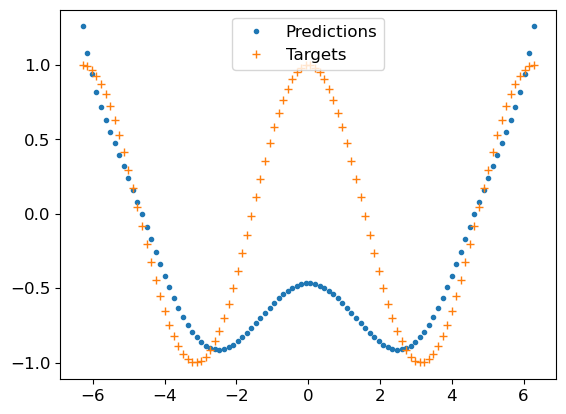

In [8]:

plt.plot(x, preds.detach(), ".", label = "Predictions")
plt.plot(x,y,"+",label="Targets")
plt.legend()
plt.show()